# **Data Pre-Processing and EDA**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import functools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,recall_score,roc_auc_score,roc_curve,classification_report,f1_score,make_scorer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving demographic.csv to demographic.csv
Saving diet.csv to diet.csv
Saving examination.csv to examination.csv
Saving labs.csv to labs.csv
Saving questionnaire.csv to questionnaire.csv


In [3]:
# Reading csv finals
demographic = pd.read_csv('demographic.csv')
diet = pd.read_csv('diet.csv')
examination = pd.read_csv('examination.csv')
labs = pd.read_csv('labs.csv')
questionnaire = pd.read_csv('questionnaire.csv')

In [4]:
# merging all csv files based on a common columns "SEQN"
dfs = [demographic,diet,examination,labs, questionnaire]
df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dfs)

In [5]:
# filtering columns
# selecting necessary columns
df_final = df_final[['RIAGENDR','RIDAGEYR','RIDAGEMN','RIDRETH1','DMQMILIZ','DMDMARTL','RIDEXPRG','INDFMPIR','BMXWT','BMXHT','BMXBMI','BPXPLS','BPXSY2','BPXDI2','LBXTC','LBXGH','URDACT', 'LBDWFL', 'LBXIN', 'LBXTR', 'LBXGLT', 'PAQ635', 'DR1TTFAT', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TALCO']]

In [6]:
df_final.rename(columns={"RIAGENDR":"Gender","RIDAGEYR":"Age","RIDAGEMN":"Age Months","RIDRETH1":"Race","DMQMILIZ":"Veteran Status","DMDMARTL":"Marital Status","RIDEXPRG":"Pregnancy","INDFMPIR":"Ratio of Income to Poverty Guidelines","BMXWT":"Weight","BMXHT":"Height","BMXBMI":"BMI","BPXPLS":"Pulse","BPXSY2":"Systolic Pressure","BPXDI2":"Diastolic Pressure","LBXTC":"Total Cholestrol(mg/dl)","LBXGH":"Glychohemoglobin","URDACT":"Albumin Creatinine level",'LBDWFL':'Water Level', 'LBXIN': 'Insulin Level', 'LBXTR': "Triglycerides", 'LBXGLT':'Glucose', 'PAQ635':'Physical Activity', 'DR1TTFAT':'Fat Intake(gms in a day)', 'DR1TKCAL': 'Energy Intake(kcal in a day)', 'DR1TPROT':'Protein Intake(gms in a day)', 'DR1TCARB':'Carbs Intake(gms in a day)', 'DR1TALCO':'Alcohol Intake(gms in a day)'},inplace=True)

In [7]:
df_final.loc[df_final['Age'] == 0, 'Age'] = df_final.loc[df_final['Age'] == 0, 'Age Months']/12

In [8]:
df_filtered = df_final[df_final['Glychohemoglobin'].notnull()]

In [9]:
#Forming the target variable based on Glychohemoglobin levels
df_filtered.loc[df_filtered['Glychohemoglobin'] < 6.5, 'Diabetes'] = 0
df_filtered.loc[df_filtered['Glychohemoglobin'] >= 6.5, 'Diabetes'] = 1

In [10]:
df_filtered.shape

(6643, 28)

In [11]:
df_filtered.reset_index(inplace=True)
df_filtered.drop(columns='index', inplace=True)

In [12]:
df_filtered

,Gender,Age,Age Months,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,...,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes
0,1,69.0,NaN,4,1.0,4.0,NaN,0.84,78.3,171.3,...,NaN,NaN,NaN,2.0,52.81,1574.0,43.63,239.59,0.0,1.0
1,1,54.0,NaN,3,2.0,1.0,NaN,1.78,89.5,176.8,...,NaN,NaN,NaN,2.0,124.29,5062.0,338.13,423.78,119.0,1.0
2,1,72.0,NaN,3,1.0,1.0,NaN,4.51,88.9,175.3,...,5.83,51.0,NaN,2.0,65.97,1743.0,64.61,224.39,0.0,1.0
3,2,73.0,NaN,3,2.0,1.0,NaN,5.00,52.0,162.4,...,6.12,75.0,NaN,2.0,55.36,1421.0,55.24,178.20,0.0,0.0
4,1,56.0,NaN,1,1.0,3.0,NaN,4.79,105.0,158.7,...,NaN,NaN,NaN,2.0,93.92,1785.0,55.11,189.59,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,NaN,3,2.0,1.0,NaN,5.00,79.5,176.2,...,NaN,NaN,NaN,2.0,17.97,1225.0,35.05,250.82,0.0,0.0
6639,1,61.0,NaN,1,2.0,1.0,NaN,3.53,99.5,173.5,...,30.71,103.0,NaN,2.0,95.36,2181.0,70.52,265.54,0.0,1.0
6640,1,80.0,NaN,3,2.0,1.0,NaN,3.09,77.1,176.0,...,NaN,NaN,NaN,2.0,69.26,2432.0,77.09,384.72,0.0,0.0
6641,1,26.0,NaN,2,2.0,5.0,NaN,NaN,71.8,171.3,...,3.76,81.0,108.0,2.0,193.51,4687.0,223.32,494.54,14.0,0.0


##Data imputation of Categorical Variables

### Pregnancy and Marital Status imputation

Pregnancy Data is for females between the 20 and 44. All the other values are null.

In [13]:
# For all the null values of pregnancy in the age group of 20 - 44, the gender is male. Hence imputing null with 2(Not pregnant)
df1 = df_filtered[df_filtered['Pregnancy'].isnull() & (df_filtered['Age']>=20) & (df_filtered['Age']<=44)]
df1.Gender.value_counts()

Gender
1    1107
Name: count, dtype: int64

In [14]:
# Imputing null values of pregnancy with 'Not pregnant' category values - 2
df_filtered['Pregnancy'] = df_filtered['Pregnancy'].fillna(2)

In [15]:
# For all the null values of Marital Status, the Age is <=19. Hence imputing null with 5(Never Married)
df1 = df_filtered[df_filtered['Marital Status'].isnull()]
df1.Age.value_counts()

Age
16.0    178
14.0    177
18.0    168
12.0    164
15.0    157
13.0    144
17.0    133
19.0    130
Name: count, dtype: int64

In [16]:
# Imputing null values of pregnancy with 'Never Married' category values - 5
df_filtered['Marital Status'] = df_filtered['Marital Status'].fillna(5)

In [17]:
# percentage null values in columns
df_filtered.isnull().mean() * 100

Gender                                     0.000000
Age                                        0.000000
Age Months                               100.000000
Race                                       0.000000
Veteran Status                            12.343821
Marital Status                             0.000000
Pregnancy                                  0.000000
Ratio of Income to Poverty Guidelines      7.617040
Weight                                     0.948367
Height                                     1.008580
BMI                                        1.129008
Pulse                                      3.206383
Systolic Pressure                          5.012795
Diastolic Pressure                         5.012795
Total Cholestrol(mg/dl)                    1.098901
Glychohemoglobin                           0.000000
Albumin Creatinine level                   1.580611
Water Level                               81.695017
Insulin Level                             53.469818
Triglyceride

In [18]:
df_filtered = df_filtered.loc[:,df_filtered.isnull().mean() < 0.75]

In [19]:
df_filtered.isnull().mean() * 100

Gender                                    0.000000
Age                                       0.000000
Race                                      0.000000
Veteran Status                           12.343821
Marital Status                            0.000000
Pregnancy                                 0.000000
Ratio of Income to Poverty Guidelines     7.617040
Weight                                    0.948367
Height                                    1.008580
BMI                                       1.129008
Pulse                                     3.206383
Systolic Pressure                         5.012795
Diastolic Pressure                        5.012795
Total Cholestrol(mg/dl)                   1.098901
Glychohemoglobin                          0.000000
Albumin Creatinine level                  1.580611
Insulin Level                            53.469818
Triglycerides                            52.671986
Glucose                                  64.729791
Physical Activity              

In [20]:
# Imputing Veteran Status and Physical Activity with 'No' Category value - 2
df_filtered['Veteran Status'] = df_filtered['Veteran Status'].fillna(2)
df_filtered['Physical Activity'] = df_filtered['Physical Activity'].fillna(2)

In [21]:
cols = ['Race', 'Veteran Status', 'Marital Status', 'Pregnancy', 'Physical Activity', 'Diabetes']
for i in cols:
  df_filtered[i] = df_filtered[i].astype('int')
  df_filtered[i] = df_filtered[i].astype('category')

In [22]:
df_filtered['Age_group'] = pd.cut(df_filtered['Age'], bins=[0,15,25,40,60,100],labels=['0-15','16-25','26-40','41-60','61 and above'])

In [23]:
df1 = df_filtered.copy(deep=True)

In [24]:
!pip install scikit-learn

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterimp = IterativeImputer()

In [26]:
cols = df_filtered.select_dtypes(include=np.number).columns.tolist()
for i in cols:
    df_filtered[i] = df_filtered[i].fillna(df_filtered.groupby('Age_group')[i].transform('mean'))

In [27]:
df_filtered.isnull().mean() * 100

Gender                                   0.0
Age                                      0.0
Race                                     0.0
Veteran Status                           0.0
Marital Status                           0.0
Pregnancy                                0.0
Ratio of Income to Poverty Guidelines    0.0
Weight                                   0.0
Height                                   0.0
BMI                                      0.0
Pulse                                    0.0
Systolic Pressure                        0.0
Diastolic Pressure                       0.0
Total Cholestrol(mg/dl)                  0.0
Glychohemoglobin                         0.0
Albumin Creatinine level                 0.0
Insulin Level                            0.0
Triglycerides                            0.0
Glucose                                  0.0
Physical Activity                        0.0
Fat Intake(gms in a day)                 0.0
Energy Intake(kcal in a day)             0.0
Protein In

In [28]:
df_filtered

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes,Age_group
0,1,69.0,4,1,4,2,0.840000,78.3,171.3,26.7,...,117.587179,137.616142,2,52.81,1574.0,43.63,239.59,0.0,1,61 and above
1,1,54.0,3,2,1,2,1.780000,89.5,176.8,28.6,...,132.911504,121.980741,2,124.29,5062.0,338.13,423.78,119.0,1,41-60
2,1,72.0,3,1,1,2,4.510000,88.9,175.3,28.9,...,51.000000,137.616142,2,65.97,1743.0,64.61,224.39,0.0,1,61 and above
3,2,73.0,3,2,1,2,5.000000,52.0,162.4,19.7,...,75.000000,137.616142,2,55.36,1421.0,55.24,178.20,0.0,0,61 and above
4,1,56.0,1,1,3,2,4.790000,105.0,158.7,41.7,...,132.911504,121.980741,2,93.92,1785.0,55.11,189.59,0.0,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,3,2,1,2,5.000000,79.5,176.2,25.6,...,132.911504,121.980741,2,17.97,1225.0,35.05,250.82,0.0,0,41-60
6639,1,61.0,1,2,1,2,3.530000,99.5,173.5,33.1,...,103.000000,137.616142,2,95.36,2181.0,70.52,265.54,0.0,1,61 and above
6640,1,80.0,3,2,1,2,3.090000,77.1,176.0,24.9,...,117.587179,137.616142,2,69.26,2432.0,77.09,384.72,0.0,0,61 and above
6641,1,26.0,2,2,5,2,2.414801,71.8,171.3,24.5,...,81.000000,108.000000,2,193.51,4687.0,223.32,494.54,14.0,0,26-40


##Exploratory Data Analysis (EDA)

In [29]:
df_filtered.describe()

,Gender,Age,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,Pulse,Systolic Pressure,Diastolic Pressure,Total Cholestrol(mg/dl),Glychohemoglobin,Albumin Creatinine level,Insulin Level,Triglycerides,Glucose,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day)
count,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000,6643.000000
mean,1.518440,42.783532,2.394197,78.772048,166.651778,28.228445,73.396075,120.463341,67.115598,182.856242,5.642556,43.475544,13.521034,111.946656,116.053243,80.666517,2099.075302,81.609327,253.459446,8.234577
std,0.499697,20.570685,1.575032,22.543079,10.094560,7.258459,11.801779,17.415431,14.090145,41.727354,1.004850,296.781988,12.724260,80.976662,30.624797,45.940047,980.331561,45.125314,123.515753,24.538836
min,1.000000,12.000000,0.000000,29.200000,136.300000,13.400000,40.000000,66.000000,0.000000,69.000000,3.500000,0.210000,0.140000,13.000000,40.000000,0.000000,117.000000,0.000000,8.670000,0.000000
25%,1.000000,24.000000,1.040000,63.200000,159.450000,23.100000,66.000000,108.000000,60.000000,154.000000,5.200000,4.860000,10.130000,79.000000,97.000000,50.490000,1471.000000,53.195000,172.575000,0.000000
50%,2.000000,42.000000,2.060000,75.700000,166.200000,27.100000,72.000000,118.000000,68.000000,179.000000,5.400000,7.440000,13.295896,117.587179,110.000000,73.510000,1952.392027,73.720000,236.790000,0.000000
75%,2.000000,60.000000,3.630000,90.600000,173.700000,31.800000,80.000000,130.000000,76.000000,207.000000,5.800000,14.765000,13.826601,132.911504,132.000000,98.795000,2504.000000,97.745000,304.200000,6.521739
max,2.000000,80.000000,5.000000,222.600000,202.600000,82.900000,180.000000,230.000000,116.000000,813.000000,17.500000,9000.000000,682.480000,4233.000000,604.000000,548.380000,12108.000000,869.490000,1423.870000,591.400000


In [30]:
df_filtered['Diabetes'].value_counts()

Diabetes
0    6039
1     604
Name: count, dtype: int64

<Axes: title={'center': 'Diabates Distribution'}, xlabel='Diabetes', ylabel='count'>

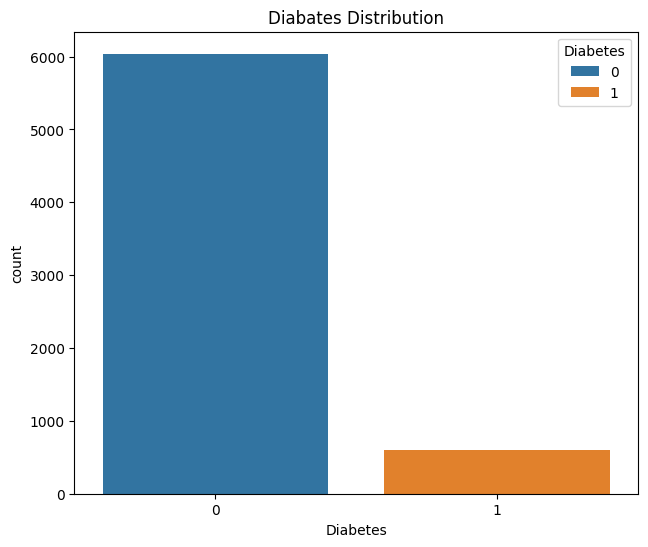

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Diabates Distribution")
sns.countplot(x = df_filtered['Diabetes'], hue=df_filtered['Diabetes'])

In [32]:
# The data has less number of diabetes people than people with diabates which shows that the data we have is imbalanced.

### Univariate Analysis

In [33]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [34]:
# creating method for univariate_countplot to avoid redundency
def univariate_countplot(df,col,h,figure_size=(6,6)):
    plt.figure(figsize=figure_size)
    plt.xticks(rotation='horizontal')
    ax1 = sns.countplot(x=col,data=df,hue=df[h])
    ax1.set(xlabel=col, ylabel='Count')
    percentage_above_bar_relative_to_xgroup(ax1)
    plt.title("Diabetes distribution with respect to " + col)
    plt.show()

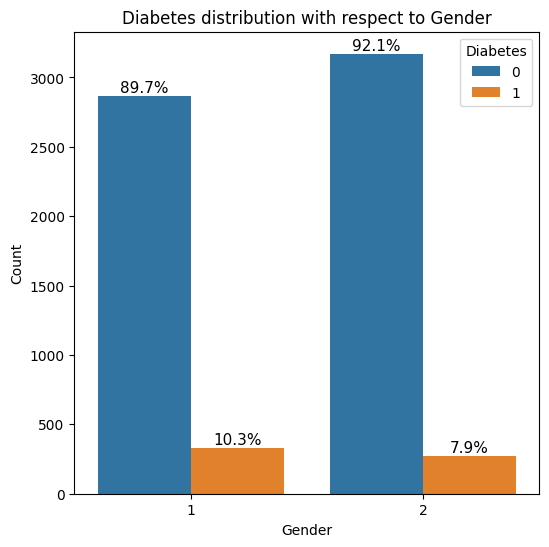

In [35]:
univariate_countplot(df_filtered,'Gender','Diabetes')

In [36]:
# From above, we can interpret that the ratio of diabetic patients in male and female are almost same.

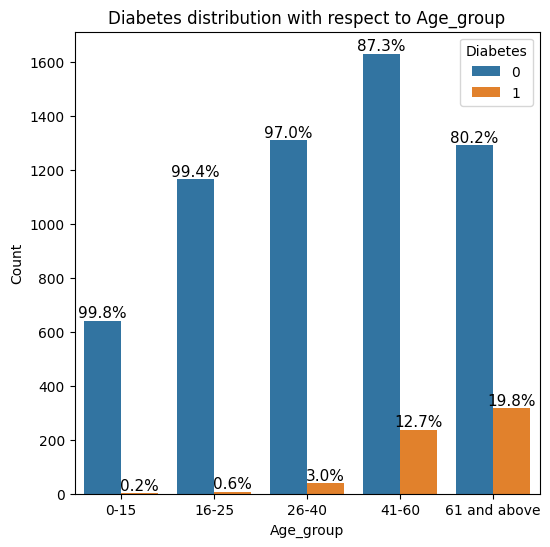

In [37]:
univariate_countplot(df_filtered,'Age_group','Diabetes')

In [38]:
# we can interpret that there more number of diabetic patients in the age group of 41 & above
# And also there is gradual increase in counts of diabetic patients in each bin

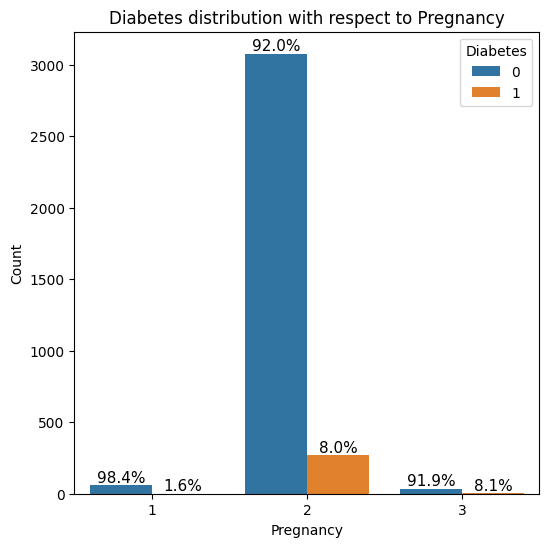

In [39]:
df_female = df_filtered[df_filtered['Gender']==2] # here 1 is encoded for male and 2 for female in dataset
univariate_countplot(df_female,'Pregnancy','Diabetes')


*   **1** is encoded to **The participant was not pregnant at exam**
*   **2** is encoded to **The participant was pregnant at exam**
*   **3** Not willing to answer





In [40]:
# We can see that pregnancy women has more number of diabatic patient than non pregnant
# however we cannot come to conclusion on this because as the age increases the chance of getting diabatic increases

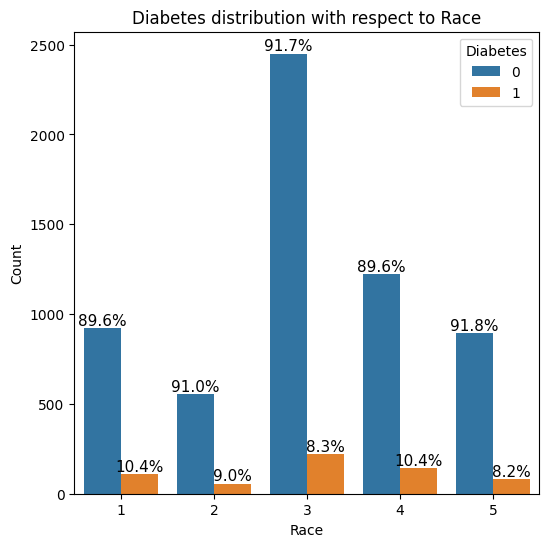

In [41]:
univariate_countplot(df_filtered,'Race','Diabetes')

In [42]:
# The percentage of diabatic patients in each race is almost same, this indicates that race has no significant impact on diabetes

## Analysis on Numerical Data

In [43]:
#creating definition for boxplot to avoid redundancy of code
def box_plot(col,df):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.boxplot(y=col[0],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[0])
    plt.subplot(1,3,2)
    sns.boxplot(y=col[1],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[1])
    plt.subplot(1,3,3)
    sns.boxplot(y=col[2],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[2])
    plt.show()


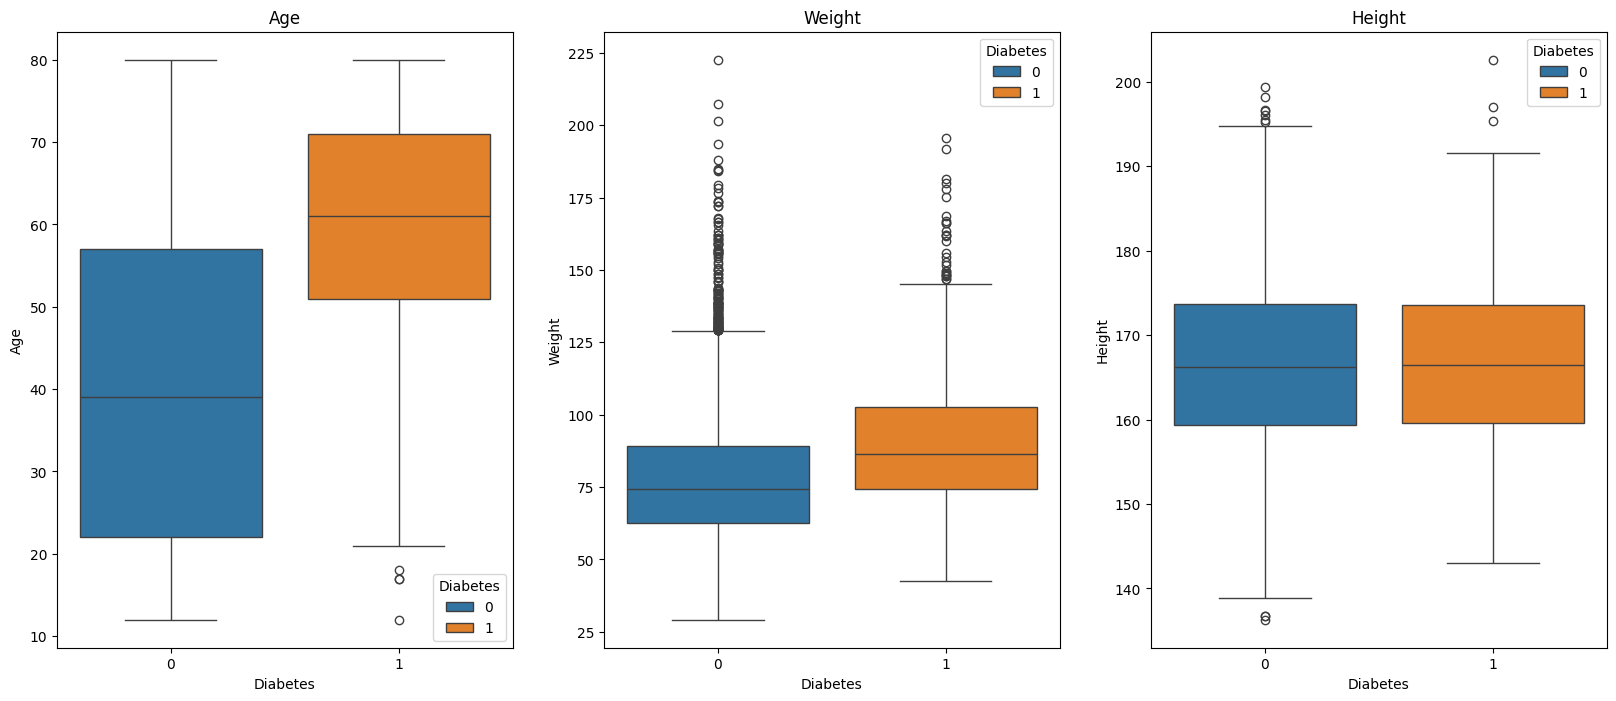

In [44]:
box_plot(['Age','Weight','Height'],df_filtered)

In [45]:
# from the above box plots, we can observe that weight and age plays major role in diabates

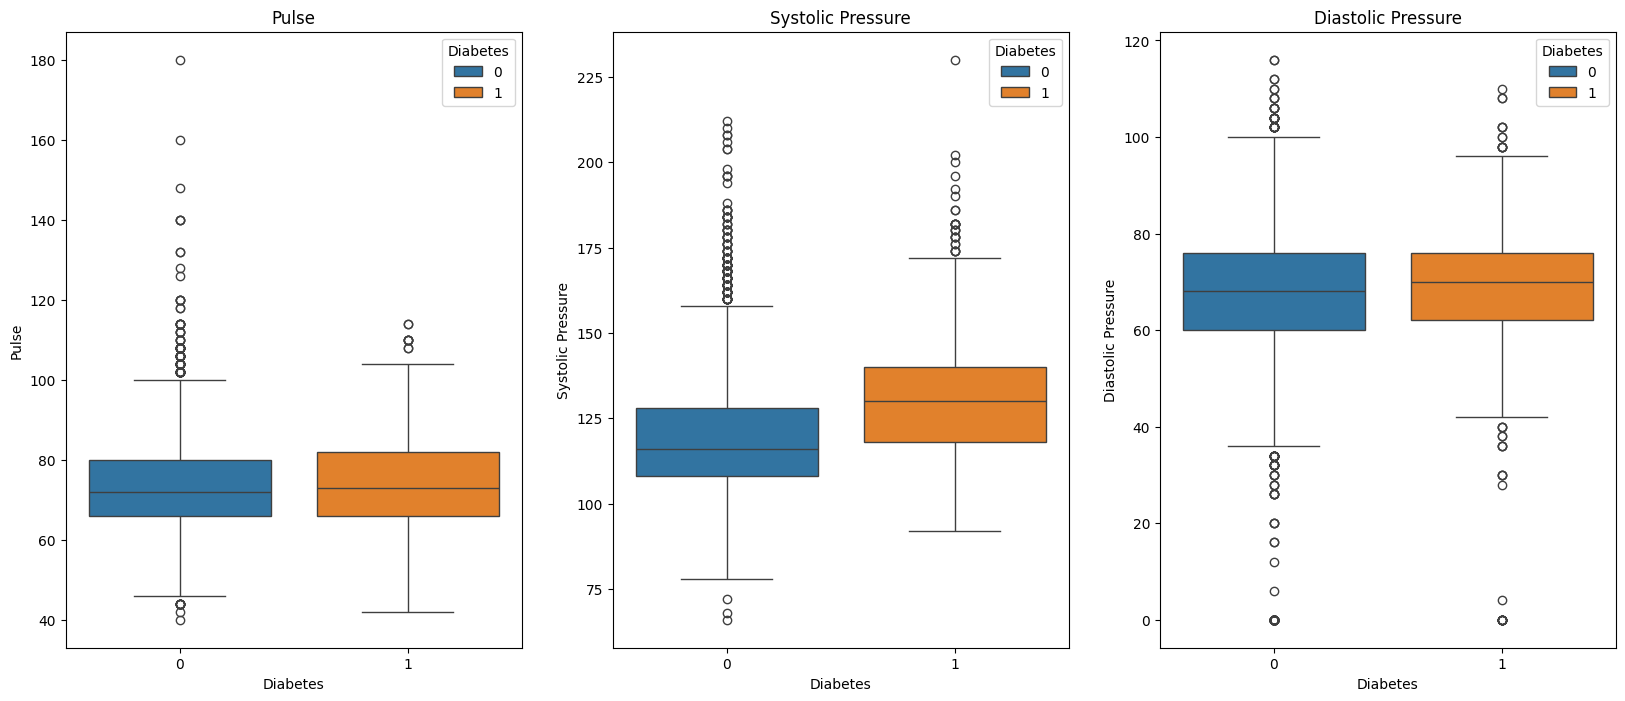

In [46]:
box_plot(['Pulse','Systolic Pressure','Diastolic Pressure'],df_filtered)

In [47]:
# From the above box plots it is observed that the systolic pressure of diabetes patients are significantly higher than normal. Where as, the diastolic pressure and pulse is simmilar to non diabetes patients

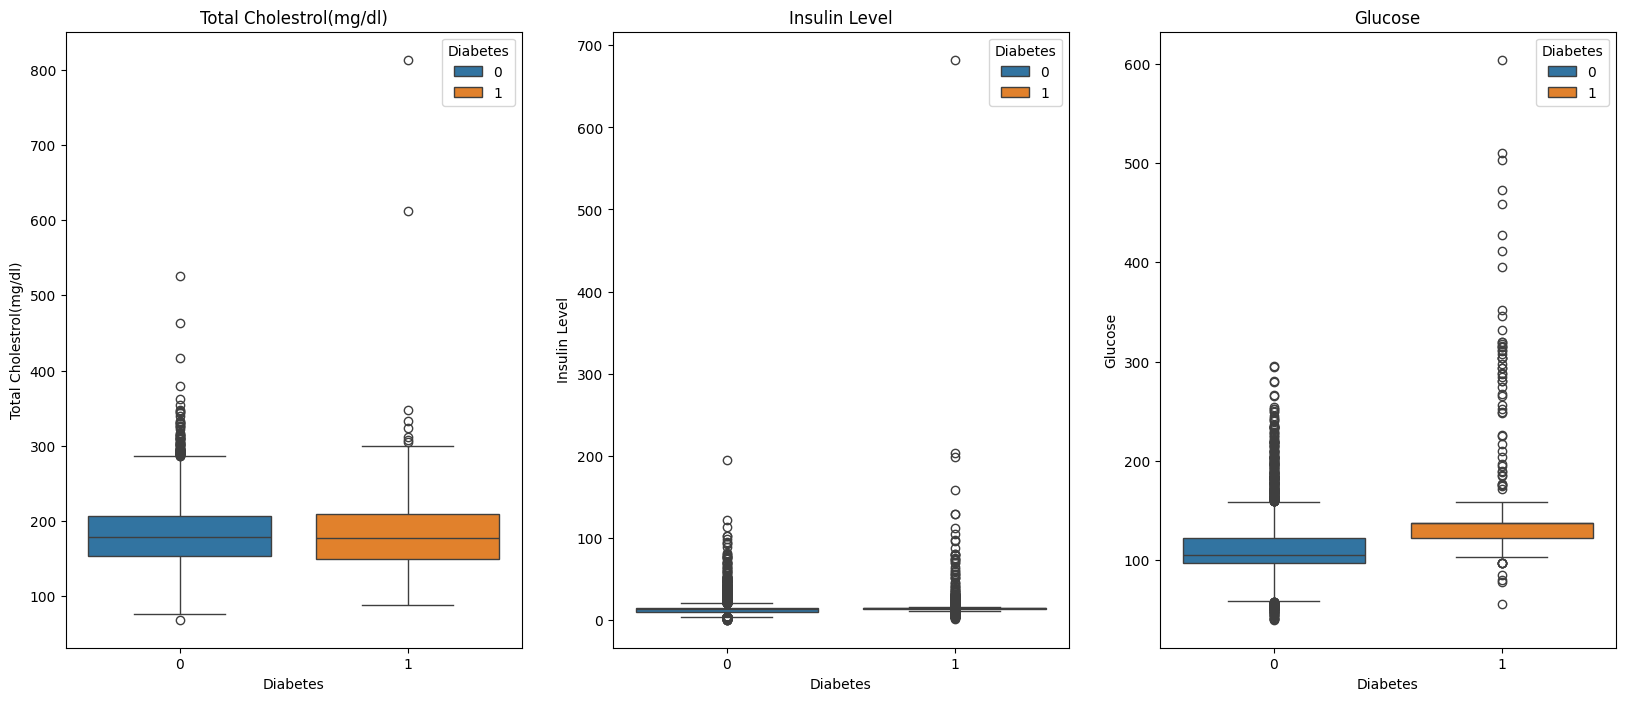

In [48]:
box_plot(['Total Cholestrol(mg/dl)','Insulin Level','Glucose'],df_filtered)

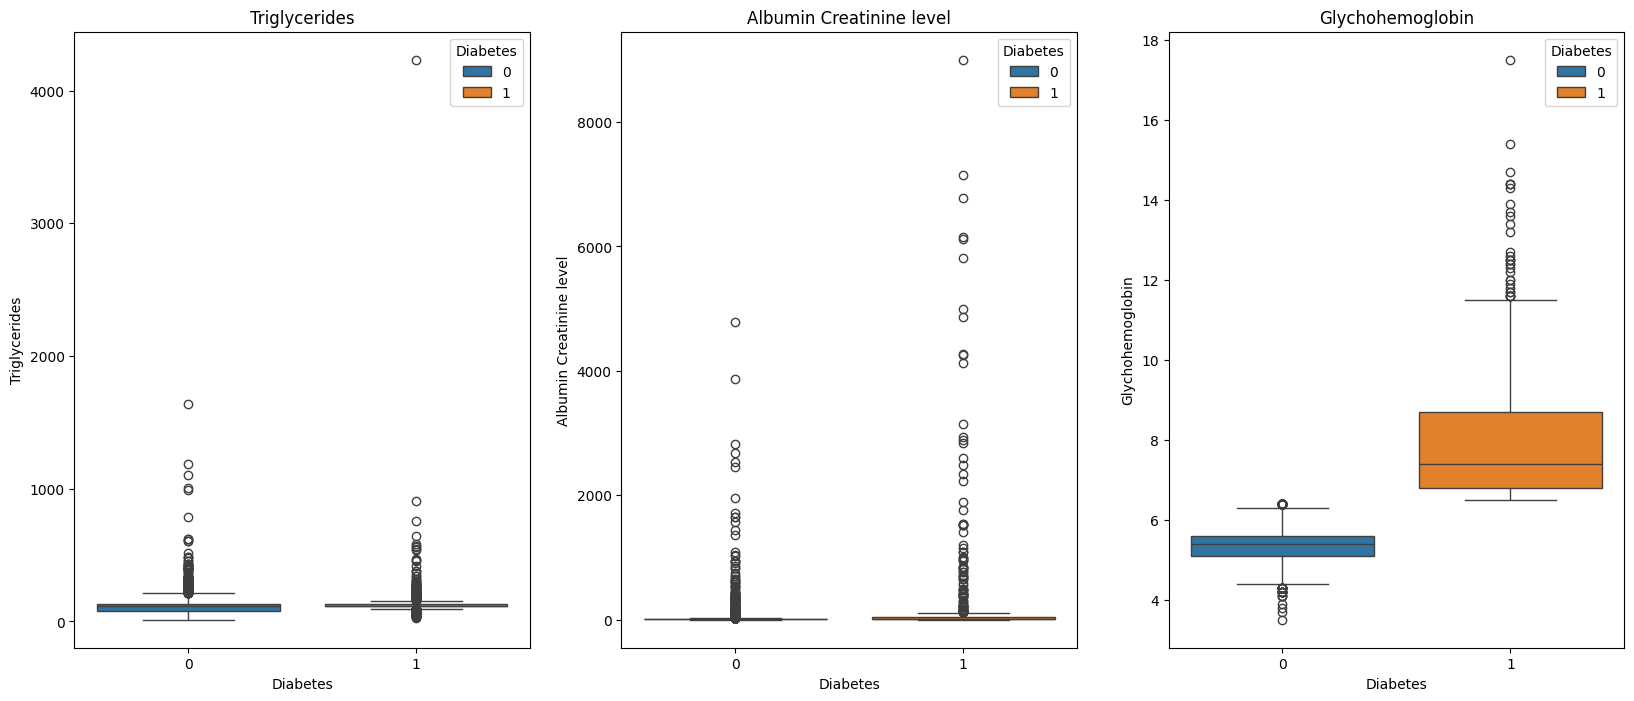

In [49]:
box_plot(['Triglycerides','Albumin Creatinine level','Glychohemoglobin'],df_filtered)

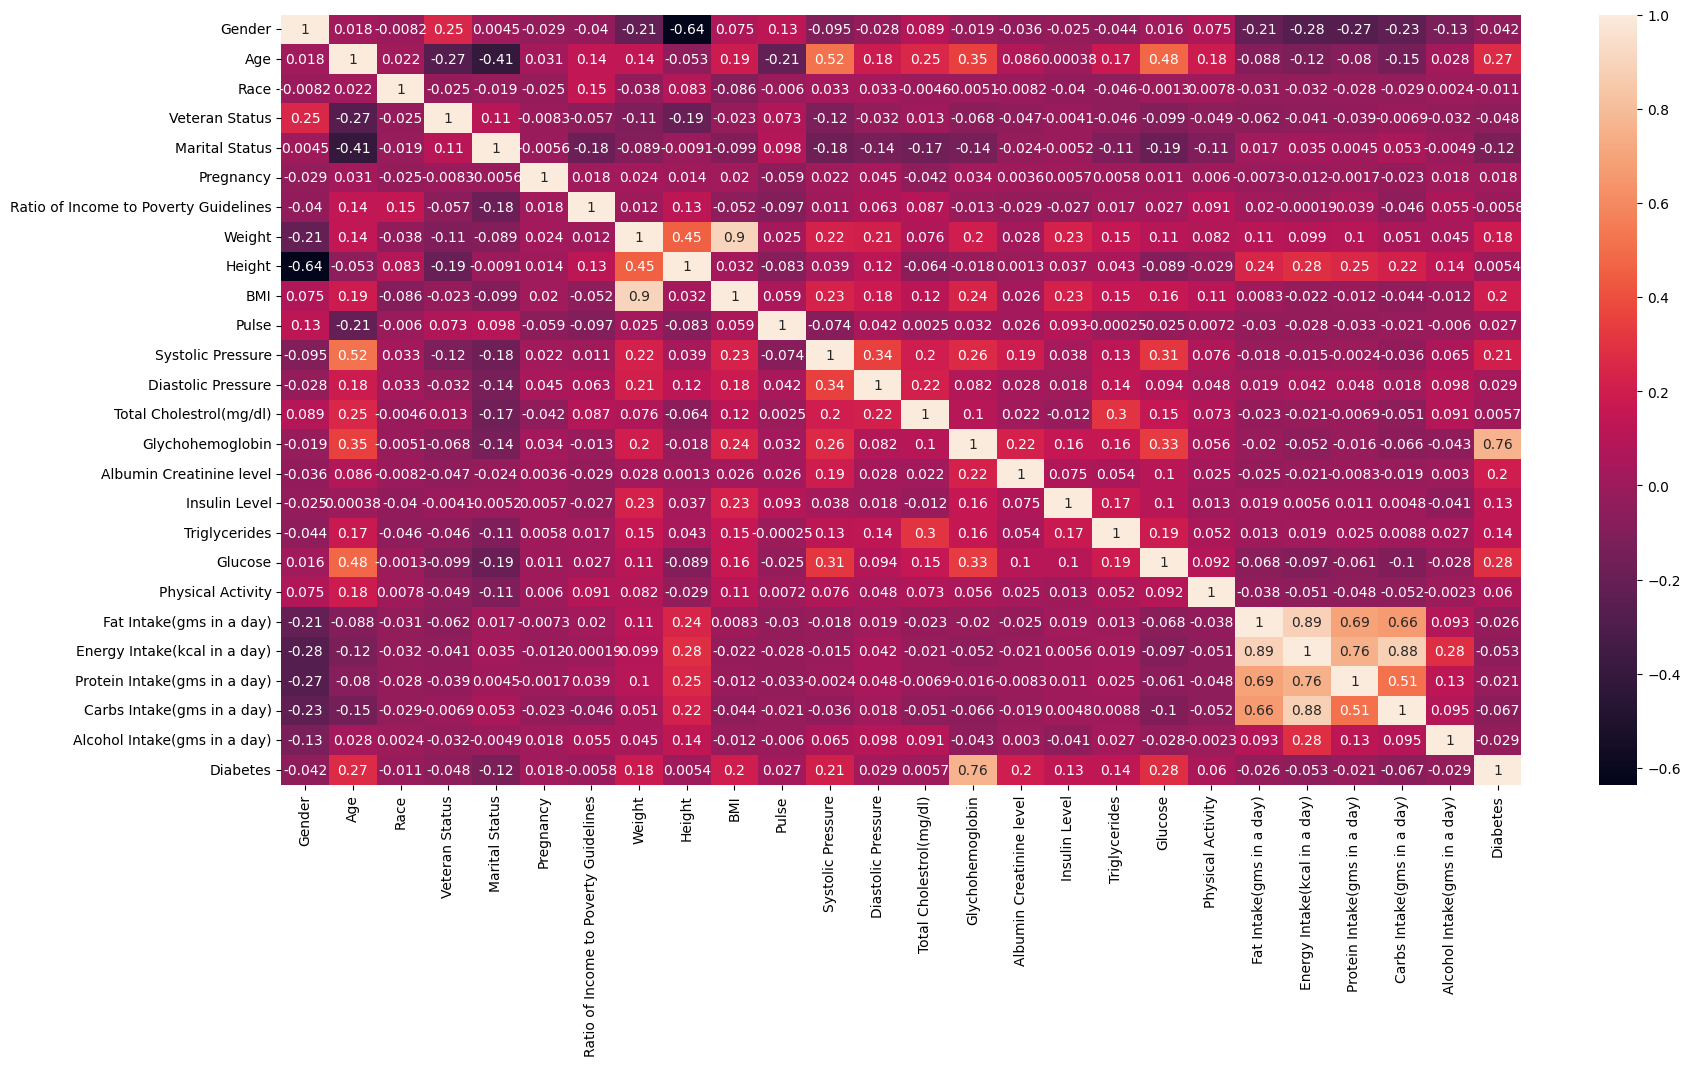

In [50]:
#create a heatmap to identify the correlation between variables

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df_heatmap = df_filtered.drop(columns='Age_group')
sns.heatmap(df_heatmap.corr(),annot=True)
plt.show()


# **Principle Component Analysis**

In [51]:
df_pca = df_filtered.copy()
df_pca.drop(columns=['Age_group'],inplace=True)
df_pca

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes
0,1,69.0,4,1,4,2,0.840000,78.3,171.3,26.7,...,13.826601,117.587179,137.616142,2,52.81,1574.0,43.63,239.59,0.0,1
1,1,54.0,3,2,1,2,1.780000,89.5,176.8,28.6,...,13.653004,132.911504,121.980741,2,124.29,5062.0,338.13,423.78,119.0,1
2,1,72.0,3,1,1,2,4.510000,88.9,175.3,28.9,...,5.830000,51.000000,137.616142,2,65.97,1743.0,64.61,224.39,0.0,1
3,2,73.0,3,2,1,2,5.000000,52.0,162.4,19.7,...,6.120000,75.000000,137.616142,2,55.36,1421.0,55.24,178.20,0.0,0
4,1,56.0,1,1,3,2,4.790000,105.0,158.7,41.7,...,13.653004,132.911504,121.980741,2,93.92,1785.0,55.11,189.59,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,3,2,1,2,5.000000,79.5,176.2,25.6,...,13.653004,132.911504,121.980741,2,17.97,1225.0,35.05,250.82,0.0,0
6639,1,61.0,1,2,1,2,3.530000,99.5,173.5,33.1,...,30.710000,103.000000,137.616142,2,95.36,2181.0,70.52,265.54,0.0,1
6640,1,80.0,3,2,1,2,3.090000,77.1,176.0,24.9,...,13.826601,117.587179,137.616142,2,69.26,2432.0,77.09,384.72,0.0,0
6641,1,26.0,2,2,5,2,2.414801,71.8,171.3,24.5,...,3.760000,81.000000,108.000000,2,193.51,4687.0,223.32,494.54,14.0,0


In [52]:
df_pca_train,df_pca_test = train_test_split(df_pca,train_size=0.7,random_state=42)
print(df_pca_train.shape)
print(df_pca_test.shape)

(4650, 26)
(1993, 26)


In [53]:
# dividing training and testing data and x,y variables
X_train = df_pca_train.drop('Diabetes',axis = 1)
y_train = df_pca_train['Diabetes']
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)

# shape of test data
X_test = df_pca_test.drop('Diabetes',axis = 1)
y_test = df_pca_test['Diabetes']
print('X_test size: ',X_test.shape)
print('y_test size: ',y_test.shape)



X_train size:  (4650, 25)
y_train size:  (4650,)
X_test size:  (1993, 25)
y_test size:  (1993,)


In [54]:
# storing the column names
X_train_cols = X_train.columns

X_test_cols = X_test.columns


In [55]:
# scaling the variables
scaler = StandardScaler()
X_train[X_train_cols] = scaler.fit_transform(X_train)
X_test[X_test_cols] = scaler.transform(X_test)

In [56]:
X_train

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Albumin Creatinine level,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day)
3898,0.956638,-0.568030,-1.735482,0.289246,-0.825467,0.044179,-0.182560,0.295915,-1.335068,1.132553,...,-0.119525,2.005377,-0.918180,2.868217,0.606772,1.141508,0.824106,1.316885,0.253560,-0.350444
73,-1.045327,1.452003,-0.082642,-3.457260,-0.825467,0.044179,1.640682,0.242814,0.959199,-0.151388,...,-0.125190,0.037449,0.117558,0.701428,0.606772,-1.315311,-1.373842,-0.864748,-1.712367,1.079377
5882,-1.045327,0.393891,-0.082642,0.289246,-0.825467,0.044179,0.492481,2.433266,1.525317,1.684786,...,-0.073341,0.019472,0.363303,0.191084,0.606772,1.497560,2.551432,0.586097,1.922458,5.232037
3095,-1.045327,-0.471837,-0.082642,0.289246,-0.825467,0.044179,0.896244,1.247324,1.684228,0.483680,...,-0.129276,-0.582503,-0.870071,-1.146539,0.606772,-0.317803,-0.580567,0.262494,-0.890372,-0.350444
4280,-1.045327,1.788675,-1.735482,0.289246,-0.825467,0.044179,-1.128879,1.999600,0.591719,1.850456,...,-0.131721,0.984309,-0.501237,5.479440,0.606772,0.257556,0.852878,0.156301,1.556664,-0.350444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.956638,-0.519933,-0.082642,0.289246,-0.825467,-8.173049,1.394639,0.136610,0.979063,-0.261835,...,-0.129895,-0.724375,-1.238906,-0.359631,0.606772,0.488784,0.283610,-0.119800,0.306318,-0.350444
5191,0.956638,-1.337566,1.570198,0.289246,0.804263,0.044179,-1.116262,-1.106859,-1.623093,-0.620786,...,-0.129988,0.136058,-0.596083,-0.425830,0.606772,-0.134481,-0.146534,-0.198176,-0.003708,-0.348633
5226,-1.045327,-0.423741,-0.082642,0.289246,-0.825467,0.044179,1.640682,0.428670,0.820153,0.097117,...,-0.131288,-0.092458,0.146496,-0.359631,0.606772,0.788708,1.336858,1.971398,1.134111,0.174707
5390,0.956638,0.393891,-0.082642,0.289246,0.396830,0.044179,-0.731425,-0.243954,-0.331947,-0.109971,...,-0.121197,-0.500693,-0.116366,-0.526374,-1.555288,-0.033916,-0.341145,-0.256366,-0.358710,-0.350444


In [57]:
# Applying SMOTE for imbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [58]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 426
Before OverSampling, counts of label '0': 4224 

After OverSampling, the shape of train_X: (8448, 25)
After OverSampling, the shape of train_y: (8448,) 

After OverSampling, counts of label '1': 4224
After OverSampling, counts of label '0': 4224


In [59]:
X_train_res.shape

(8448, 25)

In [60]:
pca = PCA(random_state=42,svd_solver='randomized')
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [61]:
pca.components_

array([[-4.56453044e-02,  1.95307686e-01, -2.91101577e-02,
        -6.27156633e-02, -9.62160402e-02,  1.22189914e-02,
        -1.98125784e-02,  1.36690561e-01,  1.64017717e-02,
         1.42665944e-01,  7.58045074e-03,  2.56612653e-01,
         8.55205364e-02,  7.21608582e-02,  5.09737047e-01,
         6.75440219e-01,  1.12378608e-01,  1.55826649e-01,
         2.53607947e-01,  5.63728930e-02, -3.14506436e-02,
        -4.64876568e-02, -1.04801323e-02, -5.49110194e-02,
        -2.68995753e-02],
       [ 1.12232416e-01, -1.06261234e-01,  1.53547955e-02,
         6.47644200e-02,  9.05556296e-02, -1.39895633e-02,
        -1.40250071e-02, -3.61898849e-01, -1.82134089e-01,
        -3.09990600e-01, -7.82526017e-03, -2.65008280e-02,
        -1.07338140e-01,  8.90934676e-03, -3.54485571e-01,
         5.98665285e-01, -2.42158258e-01, -1.17599462e-01,
        -1.86154215e-01, -3.59455386e-02, -1.83430379e-01,
        -1.66368408e-01, -1.48916006e-01, -1.18243880e-01,
        -2.29941861e-02],
    

In [62]:
# looking at PCA explained varianced ratio
explained_variance = pca.explained_variance_
explained_variance

array([5.33174399e+00, 3.54280150e+00, 3.31595103e+00, 1.86793152e+00,
       1.82635007e+00, 1.66201674e+00, 1.38745558e+00, 1.19427243e+00,
       1.09199649e+00, 1.01328510e+00, 9.28951222e-01, 7.99172018e-01,
       7.54168807e-01, 7.35761526e-01, 6.65279445e-01, 6.15447078e-01,
       5.79860475e-01, 5.37818264e-01, 5.00447299e-01, 3.76708156e-01,
       2.82967563e-01, 2.72692904e-01, 1.98141530e-01, 7.38328907e-03,
       2.87504306e-04])

In [63]:
# proportion variance for each pc
proportion_variance = explained_variance / np.sum(explained_variance)
proportion_variance

array([1.80805168e-01, 1.20140206e-01, 1.12447463e-01, 6.33435650e-02,
       6.19334933e-02, 5.63607737e-02, 4.70501096e-02, 4.04990613e-02,
       3.70307744e-02, 3.43615866e-02, 3.15017342e-02, 2.71007819e-02,
       2.55746747e-02, 2.49504640e-02, 2.25603409e-02, 2.08704718e-02,
       1.96636918e-02, 1.82379953e-02, 1.69707057e-02, 1.27745784e-02,
       9.59573413e-03, 9.24730943e-03, 6.71919222e-03, 2.50375266e-04,
       9.74957997e-06])

In [64]:
# cumulative variance for each pc
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
cummulative_variance

array([0.18080517, 0.30094537, 0.41339284, 0.4767364 , 0.5386699 ,
       0.59503067, 0.64208078, 0.68257984, 0.71961061, 0.7539722 ,
       0.78547393, 0.81257472, 0.83814939, 0.86309986, 0.8856602 ,
       0.90653067, 0.92619436, 0.94443236, 0.96140306, 0.97417764,
       0.98377337, 0.99302068, 0.99973988, 0.99999025, 1.        ])

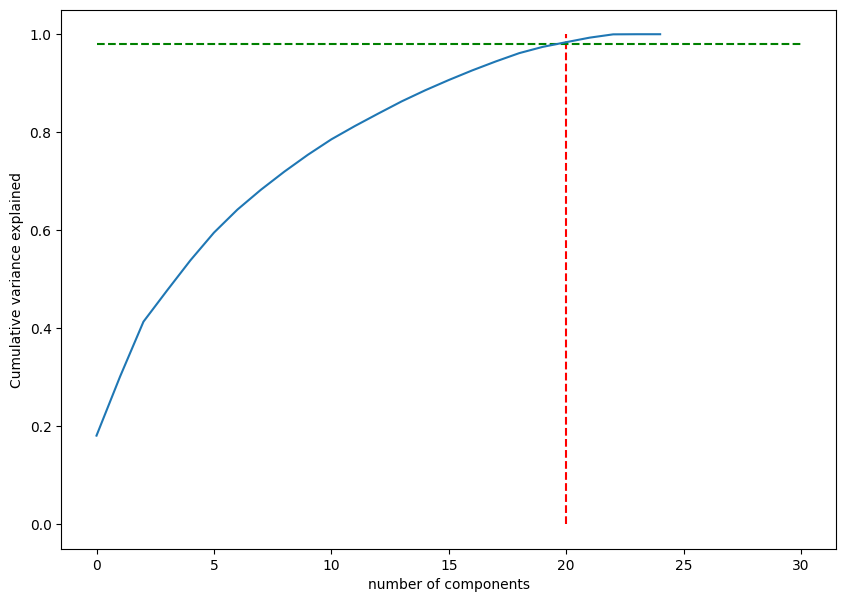

In [65]:
fig = plt.figure(figsize=[10,7])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(cummulative_variance)
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")

plt.show()

In [66]:
pca_final = PCA(n_components=20)
train_pca = pca_final.fit_transform(X_train_res)

In [67]:
# looking at PCA explained varianced ratio
explained_variance_final = pca_final.explained_variance_
# proportion variance for each pc
proportion_variance_final = explained_variance_final / np.sum(explained_variance_final)
# cummulative variance for each pc
cummulative_variance_final = np.cumsum(pca_final.explained_variance_ratio_)

In [68]:
explained_variance_final

array([5.33174399, 3.5428015 , 3.31595103, 1.86793152, 1.82635007,
       1.66201674, 1.38745558, 1.19427243, 1.09199649, 1.0132851 ,
       0.92895122, 0.79917202, 0.75416881, 0.73576153, 0.66527945,
       0.61544708, 0.57986047, 0.53781826, 0.5004473 , 0.37670816])

In [69]:
# Create a dataframe to store the results
df = pd.DataFrame({'Explained Variance': explained_variance_final,'Proportion Variance': proportion_variance_final,'Cumulative Variance': cummulative_variance_final},
                  index=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
df

,Explained Variance,Proportion Variance,Cumulative Variance
PC1,5.331744,0.185598,0.180805
PC2,3.542801,0.123325,0.300945
PC3,3.315951,0.115428,0.413393
PC4,1.867932,0.065023,0.476736
PC5,1.826350,0.063575,0.538670
PC6,1.662017,0.057855,0.595031
PC7,1.387456,0.048297,0.642081
PC8,1.194272,0.041573,0.682580
PC9,1.091996,0.038012,0.719611
PC10,1.013285,0.035272,0.753972


In [70]:
train_pca.shape # this is transformed X_train_pca

(8448, 20)

In [71]:
# applying transformation on testset
# we dont need to apply smote here because we've already trained model on balanced dataset
test_pca = pca_final.transform(X_test)
test_pca.shape # transformed X_test pca

(1993, 20)

In [72]:
# creating pca's for train and test data
df_train_pca = pd.DataFrame(train_pca,
                  columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
df_test_pca = pd.DataFrame(test_pca,
                  columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

# **Evaluation Functions**

In [73]:
def evaluation_metric(actual,predicted,pred_prob=None):
    print ("Recall/Sensitivity : %.4g" % recall_score(actual, predicted))
    print('confusion matrix :\n' , confusion_matrix(actual, predicted))
    print('Accuracy of model \n', accuracy_score(actual, predicted))
    print("AUC Score : %.4g" % roc_auc_score(actual, pred_prob))

In [74]:
# function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None #fpr, tpr, thresholds

In [75]:
def models_metrics(model, actual,predicted,pred_prob=None):
    from sklearn import metrics
    confusion = confusion_matrix(actual, predicted, labels=[1,0])
    TP = confusion[0,0] # true positive
    TN = confusion[1,1] # true negatives
    FP = confusion[1,0] # false positives
    FN = confusion[0,1] # false negatives
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Positive(1)', 'Negative(0)'])
    cm_display.plot()
    cm_display.ax_.set_title('Diabetes Prediction')
    plt.show()
    #metric_df = pd.DataFrame(columns=['Model', 'Sensitivity', 'Specificity','Accuracy','AUC Score', 'F1-Score'])
    add_row = pd.DataFrame([{'Model': model, 'Sensitivity': (TP / float(TP+FN)), 'Specificity': (TN / float(TN+FP)),
               'Accuracy' : accuracy_score(actual, predicted),'AUC Score': roc_auc_score(actual, pred_prob), 'F1-Score': f1_score(actual, predicted)}])

    return add_row

In [76]:
def all_metrics(actual,predicted):
    confusion = confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity : %.4g' % (TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity : %.4g' % (TN / float(TN+FP)))
    # Calculate false postive rate - predicting Diabetic when customer does not have Diabetic
    print('FPR : %.4g' % (FP/ float(TN+FP)))
    # positive predictive value
    print ('Positive predictive value : %.4g'%(TP / float(TP+FP)))
    # Negative predictive value
    print ('Negative predictive value : %.4g'%(TN / float(TN+ FN)))

# **Model Building and Evaluation**

## Logistic Regression

In [77]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
X_train_logreg = df_train_pca.copy()
y_train_logreg = y_train_res.copy()
X_test_logreg = df_test_pca.copy()
y_test_logreg = y_test.copy()

print(X_train_logreg.shape)
print(y_train_logreg.shape)
print(X_test_logreg.shape)
print(y_test_logreg.shape)


(8448, 20)
(8448,)
(1993, 20)
(1993,)


In [78]:
lr = LogisticRegression()
lr.fit(X_train_logreg,y_train_logreg)

LogisticRegression()

In [79]:
y_train_pred_logreg = lr.predict(X_train_logreg)
y_train_pred_proba_logreg = lr.predict_proba(X_train_logreg)

In [80]:
#calling evalutaion metric funtion created earlier to see the performance on the train data
df_train_logistic_regression = all_metrics(y_train_logreg, y_train_pred_logreg)
df_train_logistic_regression

Sensitivity : 1
Specificity : 0.9943
FPR : 0.005682
Positive predictive value : 0.9944
Negative predictive value : 1


In [81]:
y_test_pred_logreg = lr.predict(X_test_logreg)
y_test_pred_proba_logreg = lr.predict_proba(X_test_logreg)

In [82]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_logistic_regression = all_metrics(y_test_logreg, y_test_pred_logreg)
df_logistic_regression

Sensitivity : 1
Specificity : 0.9906
FPR : 0.009366
Positive predictive value : 0.9128
Negative predictive value : 1


#### Ploting ROC Curve

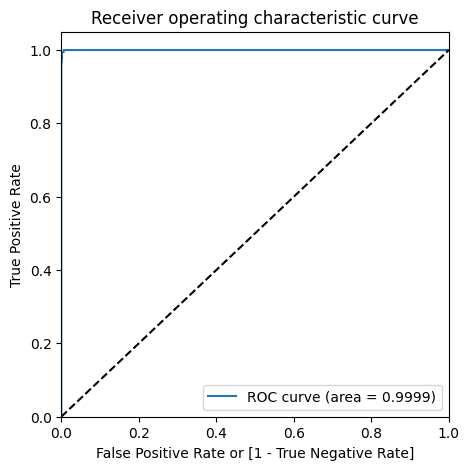

In [83]:
#roc curve
draw_roc(y_test_logreg,y_test_pred_proba_logreg[:, 1])

## KNN Clssifier

In [84]:


# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
X_train_knn = df_train_pca.copy()
y_train_knn = y_train_res.copy()
X_test_knn = df_test_pca.copy()
y_test_knn = y_test.copy()

print(X_train_knn.shape)
print(y_train_knn.shape)
print(X_test_knn.shape)
print(y_test_knn.shape)

(8448, 20)
(8448,)
(1993, 20)
(1993,)


Text(0, 0.5, 'Accuracy Score')

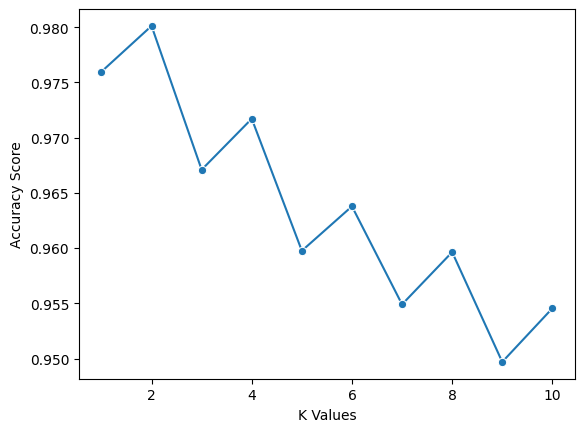

In [85]:
# Finding optimal K using cross validation
k_values = [i for i in range (1,11)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring= 'accuracy')
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [86]:
# Getting optimal k
optimal_k = k_values[scores.index(max(scores))]
optimal_k

2

In [87]:
# Fitting the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
y_pred_k = knn.predict(X_train_knn)

In [88]:
y_scores_k = knn.predict_proba(X_train_knn)

In [89]:
all_metrics(y_test_knn, y_pred_knn)


Sensitivity : 0.7135
Specificity : 0.9791
FPR : 0.02094
Positive predictive value : 0.7697
Negative predictive value : 0.9721


In [90]:
evaluation_metric(y_train_knn, y_pred_k, y_scores_k[:, 1])

Recall/Sensitivity : 0.9998
confusion matrix :
 [[4224    0]
 [   1 4223]]
Accuracy of model 
 0.9998816287878788
AUC Score : 1


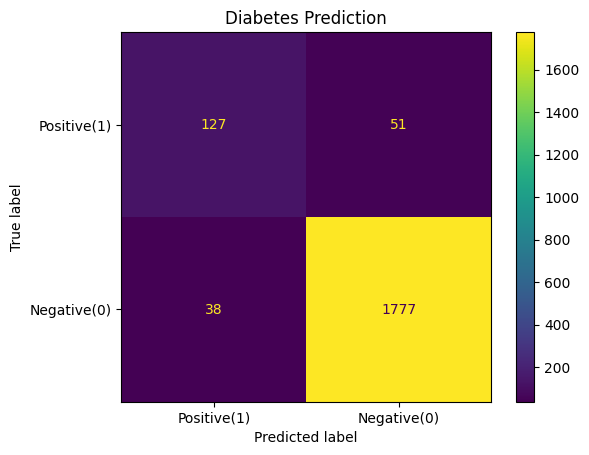

In [91]:

# Calculating Accuracy, AUC

y_scores_knn = knn.predict_proba(X_test_knn)
df_knn = models_metrics('KNN', y_test_knn, y_pred_knn, y_scores_knn[:, 1])


In [92]:
df_knn

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,KNN,0.713483,0.979063,0.955344,0.914056,0.740525


In [93]:
y_test_knn.value_counts()

Diabetes
0    1815
1     178
Name: count, dtype: int64

In [94]:
(y_pred_knn)

array([0, 0, 0, ..., 0, 0, 0])

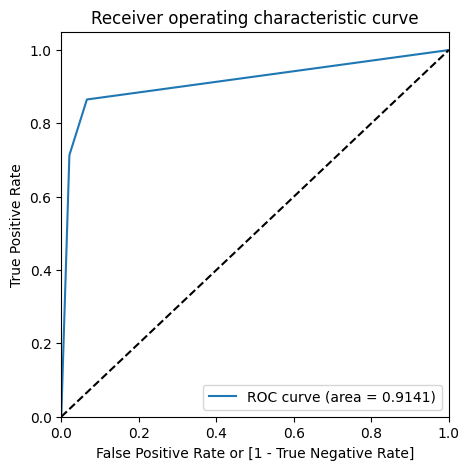

In [95]:
# ROC
draw_roc(y_test_knn, y_scores_knn[:, 1])

In [96]:
confusion = confusion_matrix(y_test_knn, y_pred_knn, labels=[1,0])

In [97]:
confusion

array([[ 127,   51],
       [  38, 1777]])

## Decision Trees

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Load the data
X_train_decision = df_train_pca.copy()
y_train_decision = y_train_res.copy()
X_test_decision = df_test_pca.copy()
y_test_decision = y_test.copy()

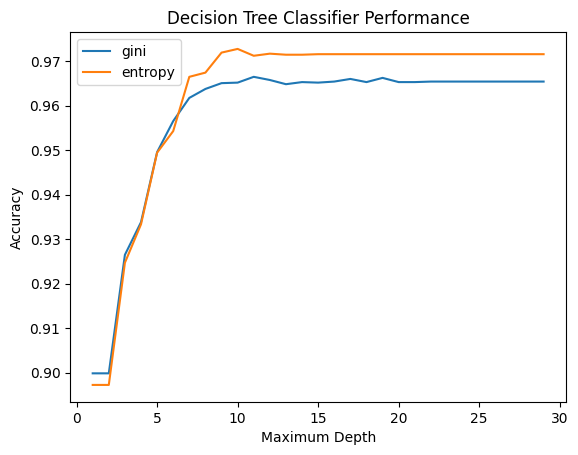

In [99]:
# Finding optimal depth and impurity method
# Define the range of maximum depths and impurity methods to try
max_depths = range(1, 30)
impurity_methods = ['gini', 'entropy']

# Initialize an empty dictionary to store the cross-validation scores
cv_scores = {}

# Loop over the maximum depths and impurity methods and compute the cross-validation score for each
for method in impurity_methods:
    cv_scores[method] = []
    for depth in max_depths:
        # Create a decision tree classifier with the current maximum depth and impurity method
        clf = DecisionTreeClassifier(max_depth=depth, criterion=method, random_state=100)

        # Compute the cross-validation score using 5-fold cross-validation
        scores = cross_val_score(clf, X_train_decision, y_train_decision, cv=5)

        # Append the mean cross-validation score to the list for the current impurity method
        cv_scores[method].append(np.mean(scores))

# Plot the cross-validation performance for different maximum depths and impurity methods
for method in impurity_methods:
    plt.plot(max_depths, cv_scores[method], label=method)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.show()

In [100]:
cv_scores['entropy'].index(max(cv_scores['entropy']))

9

In [101]:
#Optimum depth and impurity method
for i in impurity_methods:
  optimal_k = cv_scores[i].index(max(cv_scores[i]))
  print(i + ' ' + str(optimal_k))

gini 10
entropy 9


In [102]:
#Fitting the model
dt_classifier = DecisionTreeClassifier(max_depth=21, criterion='entropy', random_state=100)
dt_classifier.fit(X_train_decision, y_train_decision)

# Predict the labels of the test data
y_pred_decision = dt_classifier.predict(X_test_decision)

In [103]:
y_pred_decision_prob = dt_classifier.predict_proba(X_test_decision)

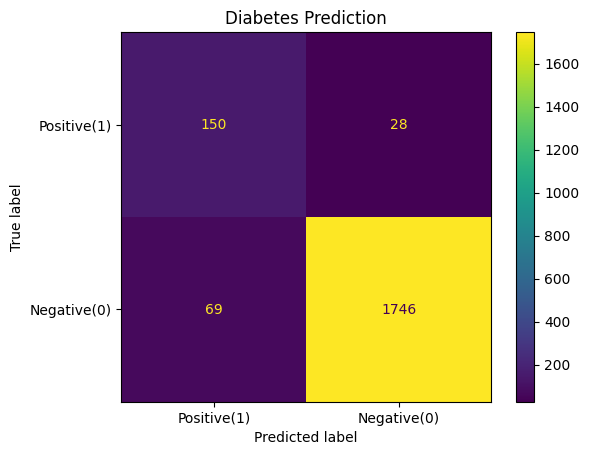

In [104]:
df_decision = models_metrics('Decision Tree',y_test_decision, y_pred_decision, y_pred_decision_prob[:, 1])

In [105]:
df_decision

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Decision Tree,0.842697,0.961983,0.95133,0.90234,0.755668


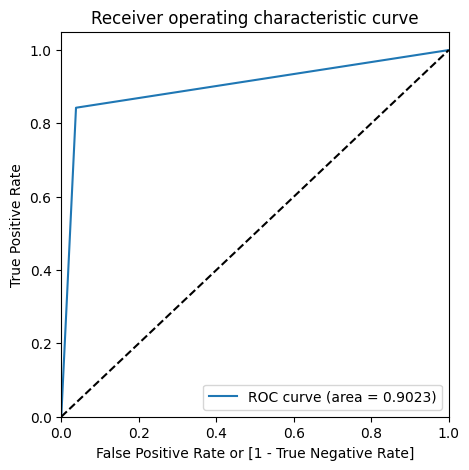

In [106]:
draw_roc(y_test_decision, y_pred_decision_prob[:, 1])

## Naive Bayes Classifier

In [107]:
# Load the data
X_train_naive = df_train_pca.copy()
y_train_naive = y_train_res.copy()
X_test_naive = df_test_pca.copy()
y_test_naive = y_test.copy()

In [108]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_clf = GaussianNB()

# Fit the classifier to the training data
naive_bayes_clf.fit(X_train_naive, y_train_naive)

# Predict the labels of the test data
y_pred_naive = naive_bayes_clf.predict(X_test_naive)
y_pred_naive_prob = naive_bayes_clf.predict_proba(X_test_naive)

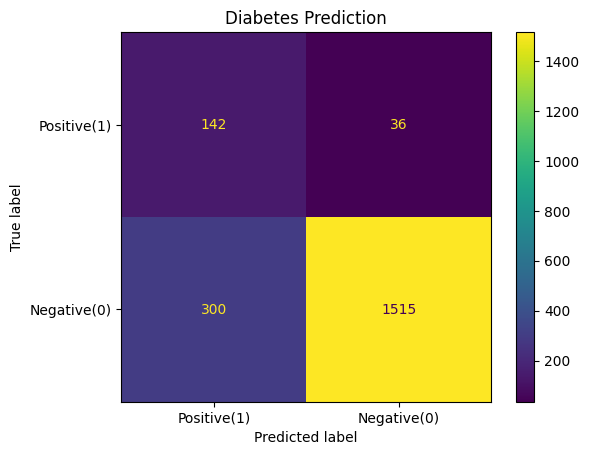

In [109]:
df_naive = models_metrics('Naive Bayes',y_test_naive, y_pred_naive, y_pred_naive_prob[:, 1])

In [110]:

df_naive

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Naive Bayes,0.797753,0.834711,0.83141,0.866879,0.458065


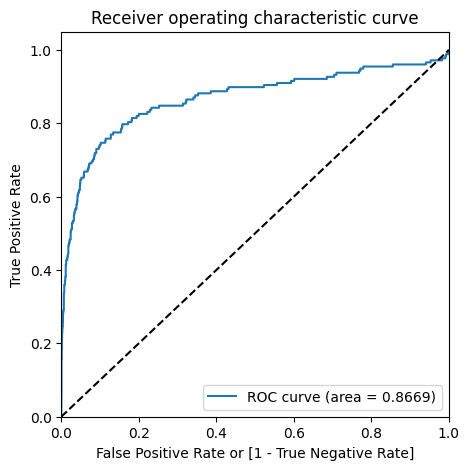

In [111]:

draw_roc(y_test_naive, y_pred_naive_prob[:, 1])

## Random Forest

In [112]:
X_train_rf = df_train_pca.copy()
y_train_rf = y_train_res.copy()
X_test_rf = df_test_pca.copy()
y_test_rf = y_test.copy()

print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)


(8448, 20)
(8448,)
(1993, 20)
(1993,)


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [115]:
y_train_pred_rf = rf.predict(X_train_rf)
y_train_pred_proba_rf = rf.predict_proba(X_train_rf)

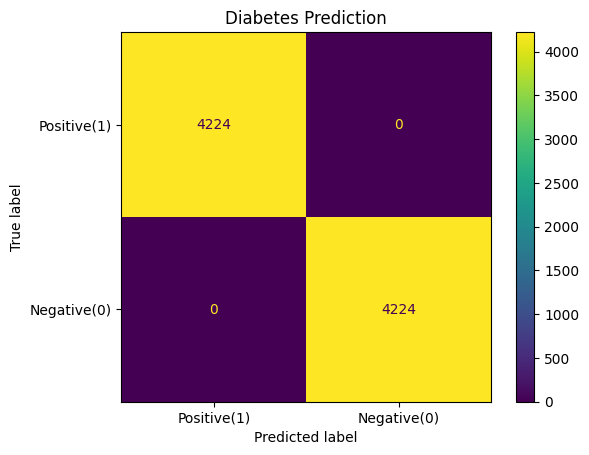

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [116]:
#calling evalutaion metric funtion created earlier to see the performance on the train data
df_train_random_forest = models_metrics("Random Forest",y_train_rf, y_train_pred_rf,y_train_pred_proba_rf[:, 1])
df_train_random_forest

In [117]:
y_test_pred_rf = rf.predict(X_test_rf)
y_test_pred_proba_rf = rf.predict_proba(X_test_rf)

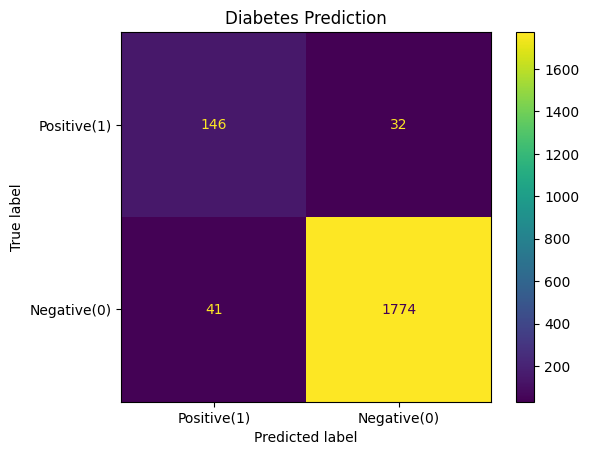

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Random Forest,0.820225,0.97741,0.963372,0.985274,0.8


In [118]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_test_random_forest = models_metrics("Random Forest",y_test_rf, y_test_pred_rf,y_test_pred_proba_rf[:, 1])
df_test_random_forest

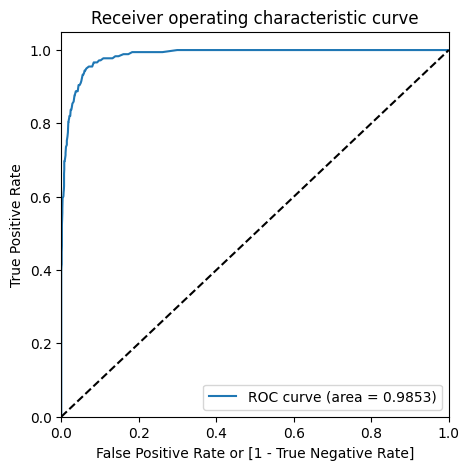

In [119]:
#roc curve
draw_roc(y_test_rf,y_test_pred_proba_rf[:, 1])

#**Hyper Parameter tuning for selected models**

## Logistic Regression with parameter tuning

In [120]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package
X_train_logreg = df_train_pca.copy()
y_train_logreg = y_train_res.copy()
X_test_logreg = df_test_pca.copy()
y_test_logreg = y_test.copy()

print(X_train_logreg.shape)
print(y_train_logreg.shape)
print(X_test_logreg.shape)
print(y_test_logreg.shape)

(8448, 20)
(8448,)
(1993, 20)
(1993,)


In [121]:
num_c = [0.01, 0.1, 1, 10, 50, 100, 200, 300]
cv_num = StratifiedKFold(n_splits=3,shuffle=True,random_state=10)
params_grid = dict(Cs = num_c)

In [122]:
# initializing logistic regression with cross validation
logreg_model = LogisticRegressionCV(penalty='l2',random_state=10)

In [123]:
logreg_model_grid = GridSearchCV(estimator = logreg_model,
                                 param_grid = params_grid,
                                 scoring = 'roc_auc',
                                 cv = cv_num,
                                 verbose = 1,
                                 n_jobs=-1,
                                 return_train_score = True
)

In [124]:
# fitting the model
logreg_model_grid.fit(X_train_logreg,y_train_logreg)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=LogisticRegressionCV(random_state=10), n_jobs=-1,
             param_grid={'Cs': [0.01, 0.1, 1, 10, 50, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [125]:
scores = logreg_model_grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005213,0.001440,0.000000,0.000000,0.01,{'Cs': 0.01},NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
1,0.002965,0.000174,0.000000,0.000000,0.1,{'Cs': 0.1},NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
2,0.178260,0.006323,0.019318,0.004218,1,{'Cs': 1},0.984129,0.988192,0.980932,0.984418,0.002971,6,0.984336,0.983745,0.986232,0.984771,0.001061
3,1.547493,0.179592,0.015404,0.003764,10,{'Cs': 10},0.999982,0.999998,0.999985,0.999989,0.000007,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,3.959873,0.244221,0.009001,0.000495,50,{'Cs': 50},0.999980,0.999999,0.999986,0.999989,0.000008,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [126]:
# Best score with best C
best_score = logreg_model_grid.best_score_
best_C = logreg_model_grid.best_params_['Cs']

print(" The highest test roc_auc is {0} at Cs = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9999890708397899 at Cs = 100


## Logistic regression with optimal C

In [127]:
lr = LogisticRegressionCV(Cs = 100, penalty = 'l2', random_state = 7)

In [128]:
#fitting the model
lr.fit(X_train_logreg,y_train_logreg)

LogisticRegressionCV(Cs=100, random_state=7)

In [129]:
# predicts the Diabetic probability for train data
y_train_pred_logreg_prob = lr.predict_proba(X_train_logreg)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Diabetic':y_train_logreg.values, 'Diabetic_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['Patient_ID'] = y_train_logreg.index

y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,4.027351e-46,0
1,0,9.490934e-23,1
2,0,2.222157e-41,2
3,0,7.179466e-53,3
4,1,1.000000e+00,4


In [130]:
# predicting Ciabetic for train data
# Creating new column 'predicted' with 1 if Diabetic_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Diabetic_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Diabetic,Diabetic_Prob,Patient_ID,predicted
0,0,4.027351e-46,0,0
1,0,9.490934e-23,1,0
2,0,2.222157e-41,2,0
3,0,7.179466e-53,3,0
4,1,1.000000e+00,4,1


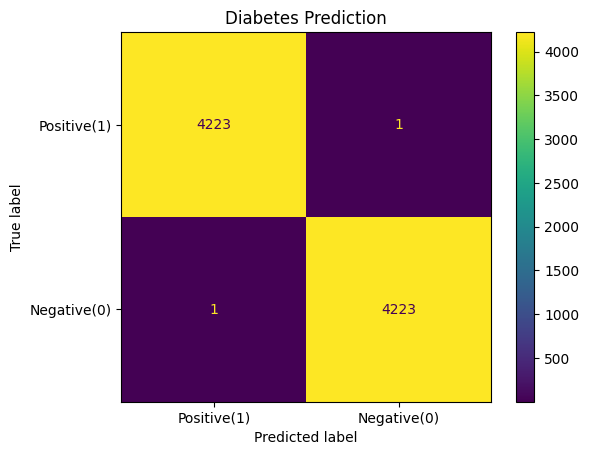

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,0.999763,0.999763,0.999763,1.0,0.999763


In [131]:
#calling evalutaion metric funtion created earlier to see the performance
df_train_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Diabetic_Prob)
df_train_logistic_regressioncv

### Finding optimal cutoff

In [132]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Diabetic_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,4.027351e-46,0,0,1,0,0,0,0,0,0,0,0,0
1,0,9.490934e-23,1,0,1,0,0,0,0,0,0,0,0,0
2,0,2.222157e-41,2,0,1,0,0,0,0,0,0,0,0,0
3,0,7.179466e-53,3,0,1,0,0,0,0,0,0,0,0,0
4,1,1.000000e+00,4,1,1,1,1,1,1,1,1,1,1,1


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.998935  1.000000  0.997869
0.2   0.2  0.999527  1.000000  0.999053
0.3   0.3  0.999527  1.000000  0.999053
0.4   0.4  0.999763  1.000000  0.999527
0.5   0.5  0.999763  0.999763  0.999763
0.6   0.6  0.999882  0.999763  1.000000
0.7   0.7  0.999882  0.999763  1.000000
0.8   0.8  0.999763  0.999527  1.000000
0.9   0.9  0.999408  0.998816  1.000000


<Figure size 500x500 with 0 Axes>

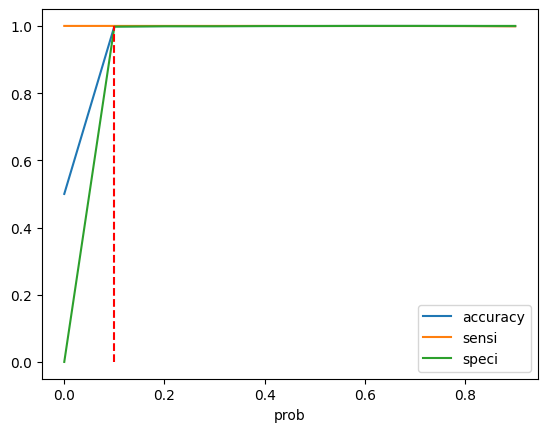

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [135]:
# from the curve, we can observe that, all the metric scores are high at 0.1 cutoff, and we are intrested in senisitivity

In [136]:
# Final cutoff points and predictions by the model
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Diabetic.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,4.027351e-46,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,9.490934e-23,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.222157e-41,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,7.179466e-53,3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1.000000e+00,4,1,1,1,1,1,1,1,1,1,1,1,1


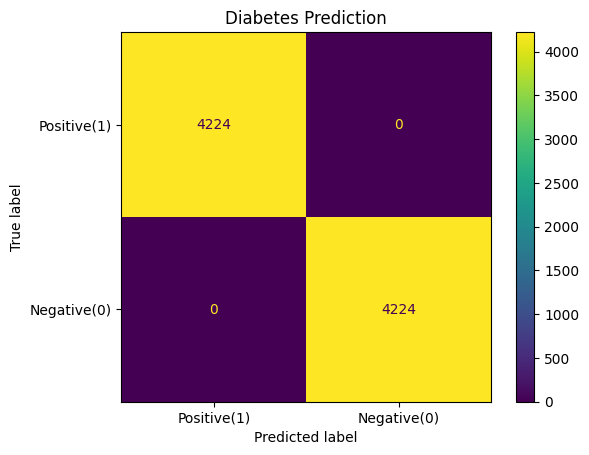

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,1.0,1.0,1.0,1.0,1.0


In [137]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
df_train_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Diabetic_Prob)
df_train_logistic_regressioncv

```On balanced data using SMOTE```

```AUC Score``` on the train data after deciding the cutoff: 100%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 100%

```Accuracy``` on the train data after deciding the cutoff: 100%

In [138]:
# predicts the Diabetic probability for test data
y_test_pred_logreg_prob = lr.predict_proba(X_test_logreg)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Diabetic':y_test_logreg.values, 'Diabetic_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['Patient_ID'] = y_test_logreg.index
y_test_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,1.389539e-23,5965
1,0,3.989465e-16,1728
2,0,1.925838e-31,3132
3,0,1.553584e-38,535
4,0,8.087936e-47,5094


In [139]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Diabetic_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,final_predicted
0,0,1.389539e-23,5965,0
1,0,3.989465e-16,1728,0
2,0,1.925838e-31,3132,0
3,0,1.553584e-38,535,0
4,0,8.087936e-47,5094,0


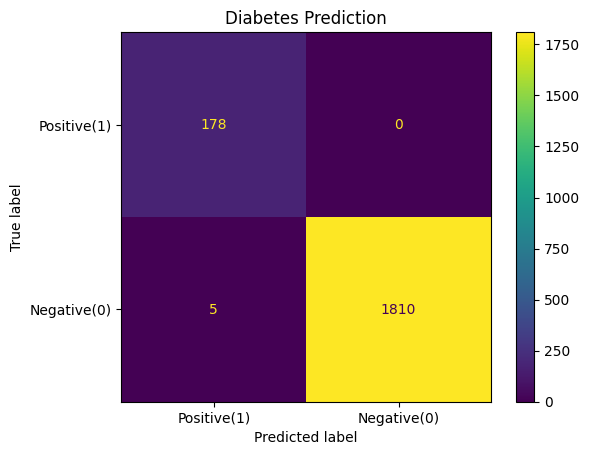

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,1.0,0.997245,0.997491,0.999969,0.98615


In [140]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_test_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_test_pred_logreg_final.Diabetic, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Diabetic_Prob )
df_test_logistic_regressioncv

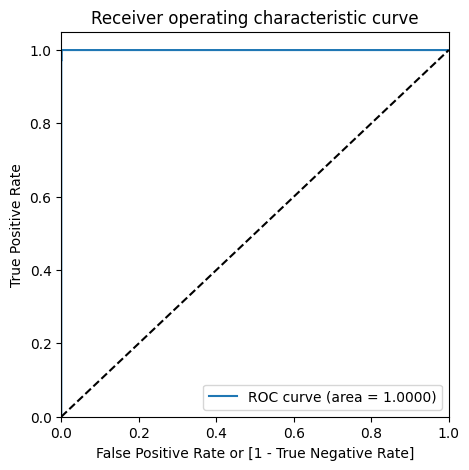

In [141]:
#roc curve
draw_roc(y_test_pred_logreg_final.Diabetic,y_test_pred_logreg_final.Diabetic_Prob)

# **Models Report**

In [143]:
merged_df = pd.concat([df_test_logistic_regressioncv, df_knn, df_decision, df_naive,df_test_random_forest])
merged_df.reset_index().drop(columns='index')

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,1.000000,0.997245,0.997491,0.999969,0.986150
1,KNN,0.713483,0.979063,0.955344,0.914056,0.740525
2,Decision Tree,0.842697,0.961983,0.951330,0.902340,0.755668
3,Naive Bayes,0.797753,0.834711,0.831410,0.866879,0.458065
4,Random Forest,0.820225,0.977410,0.963372,0.985274,0.800000
